# Give Peace a Chance:

#### Worldwide Governance Indicators

# Goal:

- Construct an ML Regression model that predicts worldwide governance using features derived from the The Worldwide Governance Indicators (WGI) project.

- Find the key drivers of worldwide governance. 

- Deliver a report that explains what steps were taken, why and what the outcome was.

- Make recommendations on what works or doesn't work in predicting overall worldwide governance.

# Imports

In [1]:
#standard DS imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
import math
from math import sqrt
import random

#sklearn imports
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import TweedieRegressor

#custom imports

import acquire
import prepare

#filter out any noisy warning flags
import warnings
warnings.filterwarnings('ignore')

# setting the seed
s = random.seed(123)

# Acquire

- Data acquired from databank.worldbank.org via the Worldwide Governance Indicators (WGI) project.
- It contained 4,927 rows and 10 columns before cleaning.
- Each row represents a country/year.
- Each column represents information about the countries governance rankings.

In [2]:
# Acquire step
world_govt_df = acquire.get_world_govt_data()

# Prepare

Prepare Actions:

- Droped the null values.
- Replaced zero placeholders with zero.
- Turned the numerical columns that were objects into floats . 
- Dropped unnecessary and redundant columns.
- Renamed confusing and exceedingly long column names . 
***Created a new column 'overall_govt' that encompases governmental rankings into one overall ranking that could be used for the target variable.**
- split the data.  

In [3]:
train, validate, test = prepare.prep_world_govt(world_govt_df)

# Data Dictionary

| Feature | Definition |
|:--------|:-----------|
|'date'|	 Year of the specified country's ranking|
|'control_corruption'|	Control of Corruption Captures perceptions of the extent to which public power is exercised for private gain, including both petty and grand forms of corruption, as well as "capture" of the state by elites and private interests.|
|'govt_effective'| Government Effectiveness captures perceptions of the quality of public services, the quality of the civil service and the degree of its independence from political pressures, the quality of policy formulation and implementation, and the credibility of the government's commitment to such policies.|
|'political_stability'|	Political Stability and Absence of Violence/Terrorism measures perceptions of the likelihood of political instability and/or politically-motivated violence, including terrorism.|
|'regulatory_quality'|	Regulatory Quality captures perceptions of the ability of the government to formulate and implement sound policies and regulations that permit and promote private sector development.| 
|'rule_of_law'|	Rule of Law captures perceptions of the extent to which agents have confidence in and abide by the rules of society, and in particular the quality of contract enforcement, property rights, the police, and the courts, as well as the likelihood of crime and violence.|
|'voice_accountability'|	Voice and Accountability captures perceptions of the extent to which a country's citizens are able to participate in selecting their government, as well as freedom of expression, freedom of association, and a free media.| 
|'overall_govt'|	Final ranking taking all six of the governmental features and producing a single score from 0-100.|

## A brief look at the data

In [4]:
# Looking at the cleaned up columns
train.head()

,date,control_corruption,govt_effective,political_stability,regulatory_quality,rule_of_law,voice_accountability,overall_govt
348,2002,77.777779,68.108109,54.497353,73.513512,65.671638,31.343283,61.818612
4038,2012,53.080570,60.663506,43.127960,64.454979,57.276997,66.197182,57.466866
397,2005,90.731705,88.725487,86.893204,83.823532,89.473686,78.846153,86.415628
4897,2020,26.442308,19.711538,43.396225,27.884615,28.846153,34.782608,30.177241
4394,1998,0.000000,0.000000,0.000000,0.000000,3.500000,3.980099,1.246683


# Explore

Questions asked:

    1) Does the rule of law strengthen overall governance?
    
    2) Does controlling corruption effect the overall governance?
    
    3) How strong of a correlation is regulatory quality and political stability in 
    relation to overall governance?  
    
    4) What is the relationship between voice and accountability and government 
    effectveness in conjunction with overall governance?  

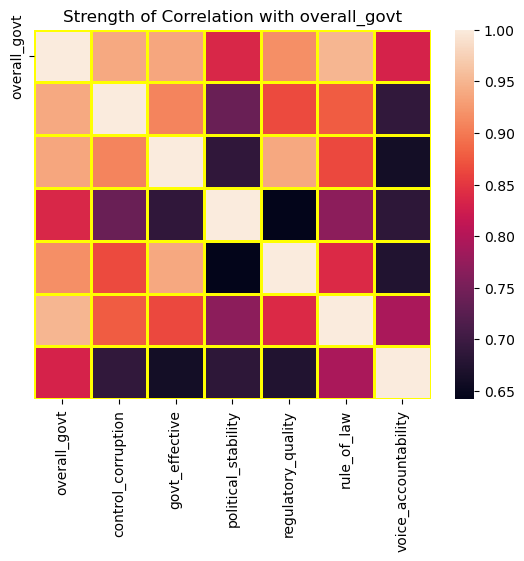

In [5]:
# Heatmap of correlations
hm_visual = prepare.visual_correlations(train)
hm_visual

***Takeaways:***

***The two strongest correlations with overall govt. are rule of law and controlling corruption.***

***The lowest correlations with eachother are regulatory quality and political stability.***

The next lowest correlation with eachother are voice and accountability and effective governance.

All features are above 60 percent indicating strong correlations, but three features are above ninety.

# 1) Does the rule of law strengthen overall governance?

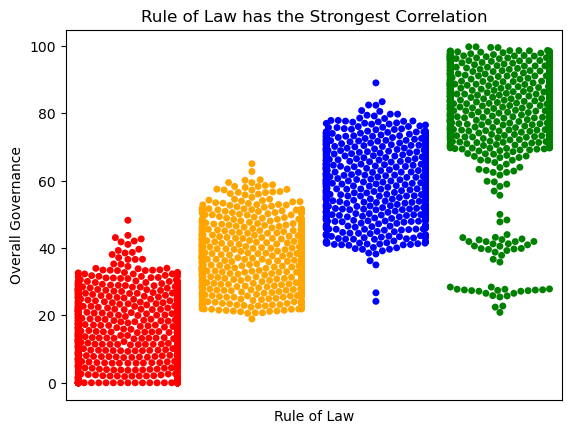

In [6]:
# Visualization showing correlation between rule of law and overall governance
rule_law_swarm = prepare.rule_of_law_visual(train)

- As the rule of law increases the overall governance increases, however, there appears to be a ***decent amount of countries with a high rule of law, but relatively low level of overall governance.***


H_0: The rule of law is irrelevant in determining overall governance.  

H_a: The rule of law will either increase or decrease overall governance.

In [7]:
# Running a spearmanr statistical test to check for correlation and have more confidence
rule_of_law_stat_test = prepare.eval_result(train)
rule_of_law_stat_test

Reject the null hypothesis.
p-value= 0.0 r= 0.95


***Takeaway:***

There is a high corellation between rule of law and overall governance. 

# 2) Does controlling corruption effect the overall governance?

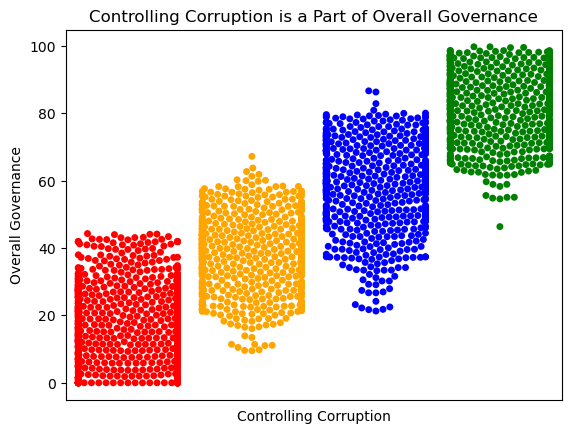

In [8]:
# Visualization showing correlation between controlling corruption and overall governance
control_corruption_swarm = prepare.control_corruption_visual(train)

- As controlling corruption increases the overall governance increases; however, there appears to be ***less above average ratings for controlling corruption then rule of law.***

H_0: Overall governance is not dependent on controlling corruption.   

H_a: Overall governance is dependent on controlling corruption.

In [9]:
# Running a spearmanr statistical test to check for correlation and have more confidence
control_corruption_stat_test = prepare.eval_result2(train)
control_corruption_stat_test

Reject the null hypothesis.
p-value = 0.0 r = 0.93


***Takeaway:***

There is a high correlation between controlling corruption and overall governance.

# 3) How strong of a correlation is regulatory quality and political stability in relation to overall governance?

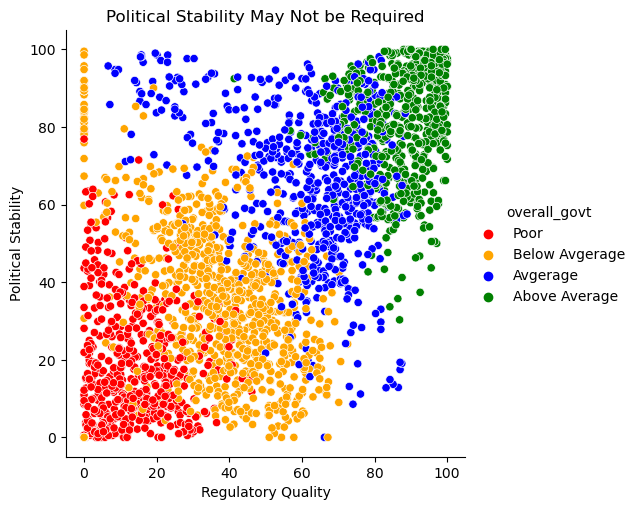

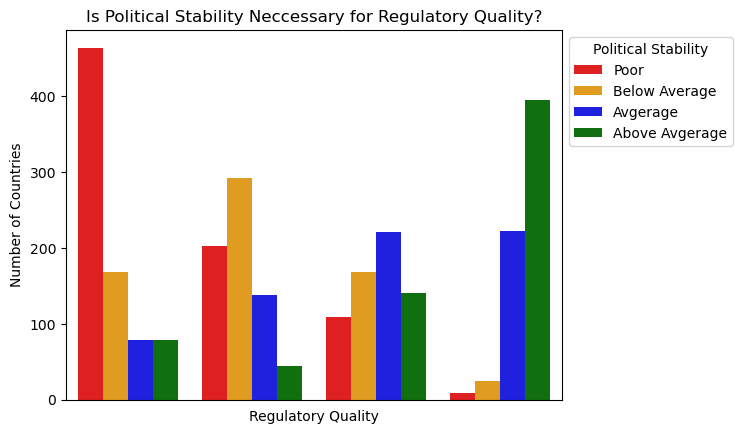

In [10]:
# Visualization showing correlation between regulatory quality,
# political stability and overall governance
stab_qual_rel_bar = prepare.stability_quality_overall_visual(train)

- ***Although some countries have a below average rating for overall governance, they still have a high political stability percentage.***
- It would appear that regulatory quailty has a higher level of correlation with overall governance than political stability.
- High levels of political stability, while occuring mostly with high levels of regulatory quality, appears at all levels throughout regulatory quality. 

H_0: Regulatory quailty does not have any correlation with overall governance.   

H_a: Regulatory quality has either a positive or negative correlation with overall governance.

H_0: Political stability does not have any correlation with overall governance.   

H_a: Political stability has either a positive or negative correlation with overall governance.

In [11]:
# Running a spearmanr statistical test to check for correlation and have more confidence
reg_qual_stat_test = prepare.eval_result3(train)
reg_qual_stat_test

Reject the null hypothesis.
p-value = 0.0 r = 0.91


In [12]:
# Running a spearmanr statistical test to check for correlation and have more confidence
pol_stab_stat_test = prepare.eval_result4(train)
pol_stab_stat_test

Reject the null hypothesis.
p-value = 0.0 r = 0.83


***Takeaway:***

There is a high correlation between regulatory quality and political stability with overall governance. However, as suspected, ***the correlation between regulatory quality and overall governance is a little over ten percent more than compared with political stability and overall governance.***

# 4) What is the relationship between voice and accountability and government effectiveness in conjunction with overall governance?

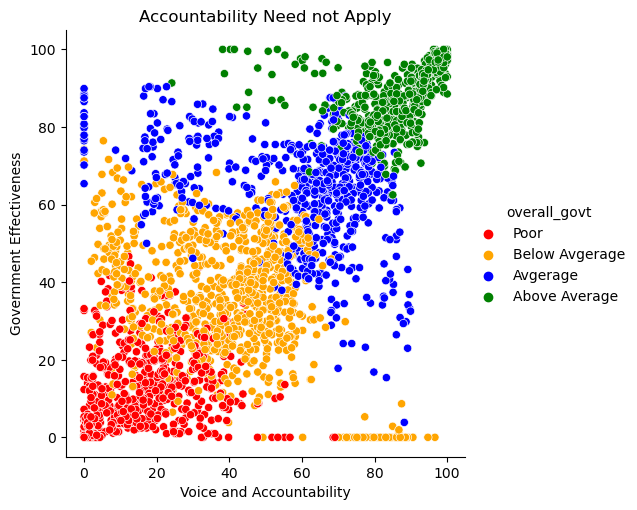

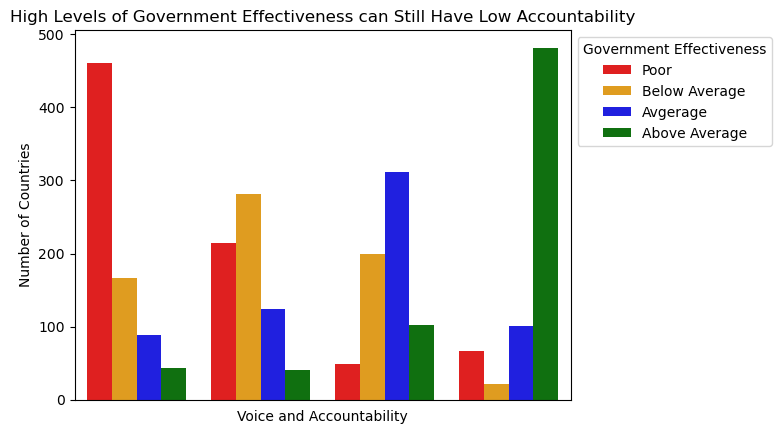

In [13]:
# Visualization showing correlation between voice and accountability,
# government effectiveness and overall governance
voice_eff_rel_bar = prepare.voice_effective_overall_visual(train)

- ***Although some countries have a below average rating for overall governance, they still have a high voice and accountability percentage.***
- It would appear that government effectiveness has a higher level of correlation with overall governance than political stability.
- There is a significant drop off in government effectiveness below the 75 percentile.
- Although a government has low levels of voice and accountability they can still have a high ranking in government effectiveness.

H_0: Voice and accountability does not have any correlation with overall governance.   

H_a: Voice and accountability has either a positive or negative correlation with overall governance.

H_0: Government effectiveness does not have any correlation with overall governance.   

H_a: Government effectiveness has either a positive or negative correlation with overall governance.

In [14]:
# Running a spearmanr statistical test to check for correlation and have more confidence
voice_acct_stat_test = prepare.eval_result5(train)
voice_acct_stat_test

Reject the null hypothesis.
p-value = 0.0 r = 0.83


In [15]:
# Running a spearmanr statistical test to check for correlation and have more confidence
eff_govt_stat_test = prepare.eval_result6(train)
eff_govt_stat_test

Reject the null hypothesis.
p-value = 0.0 r = 0.93


***Takeaway:***

There is a high correlation between voice and accountability and government effectiveness with overall governance. However, as suspected, ***the correlation between governement effectiveness and overall governance is a little over ten percent more than compared with voice and accountability and overall governance.***

# Exploration Summary

- A high level of rule of law does not necessarily mean a high ranking for overall governance.
- Controlling corruption appears to have little to none countries outside of expected rankings when compared to overall governance.
- Countries can maintain high rankings for overall governance even though they have low levels of political stability.
- Some countries can maintain high voice and accountability ratings while having a low ranking for overall governance, and vice versa, some countries can have high overall governance while possessing low levels of voice and accountability.

# Features I am moving to modeling With

- All features have a high level of correlation with overall governance at 65 percent or higher, with three of the features 'rule_of_law', 'controlling_corruption', and 'govt_effective' at 90 percent or higher, while 'voice_accoutability' and 'political_stability' were just slightly above 60 percent.

# Features I'm not moving to modeling with

- I have chosen to move forward with all the features because of the limited number of features and the high correlation between all of the features and overall governance.

# Modeling

- The mean on train and validate will be the baseline I use for this project.
- I will be evaluating models developed using four different model types and various hyperparameter configurations. 
- Models will be evaluated on train and validate data. 
- The model that performs the best will then be evaluated on test data. 
- ***The linear regression model produced the best results.***

In [16]:
# Function for creating the X_train, y_train, X_validate, y_validate, X_test, y_test, and
# checking the shape.
X_train, y_train, X_validate, y_validate, X_test, y_test = prepare.X_y_split(train, 'overall_govt')

X_train -> (1542, 7)
X_validate -> (662, 7)
X_test -> (551, 7)


In [17]:
# Scale the data
train_scaled, validate_scaled, test_scaled = prepare.scale_data(train, validate, test)

In [18]:
# Feture engineering usings RFE to confirm best features.
feature_ranks = prepare.rfe(X_train, y_train, 3)
feature_ranks

,ranking,feature
1,1,control_corruption
2,1,govt_effective
5,1,rule_of_law
6,2,voice_accountability
4,3,regulatory_quality
3,4,political_stability
0,5,date


In [19]:
# Start with the baseline
baseline = prepare.baseline(y_train, y_validate)
baseline

RMSE using Mean
Train/In-Sample:  27.04 
Validate/Out-of-Sample:  26.93
RMSE using Median
Train/In-Sample:  27.33 
Validate/Out-of-Sample:  27.32


# Linear Regression Model

In [20]:
# calling the function for the linear regression model
lr_model = prepare.linear_reg_model(X_train, y_train, y_validate, X_validate)
lr_model

RMSE for OLS using LinearRegression
Training/In-Sample:  2.196747072969514e-14 
Validation/Out-of-Sample:  2.2413957101439188e-14


- Linear regression model performed better than the baseline on train and validate

# Tweedie Model

In [21]:
# Calling the function for the tweedie model
tm_model = prepare.tweedie_model(X_train, y_train, y_validate, X_validate)
tm_model

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  7.166445664028766 
Validation/Out-of-Sample:  7.2098014657288125


- Tweedie model performed better than the baseline on train and validate

# Polynomial Model

In [22]:
# Calling the function for the polynomial model
pf_model = prepare.poly_model(X_train, y_train, y_validate, X_validate)
pf_model

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  2.721383529993502e-14 
Validation/Out-of-Sample:  2.7186836553159794e-14


- Polynomial model performed better than the baseline on train and validate

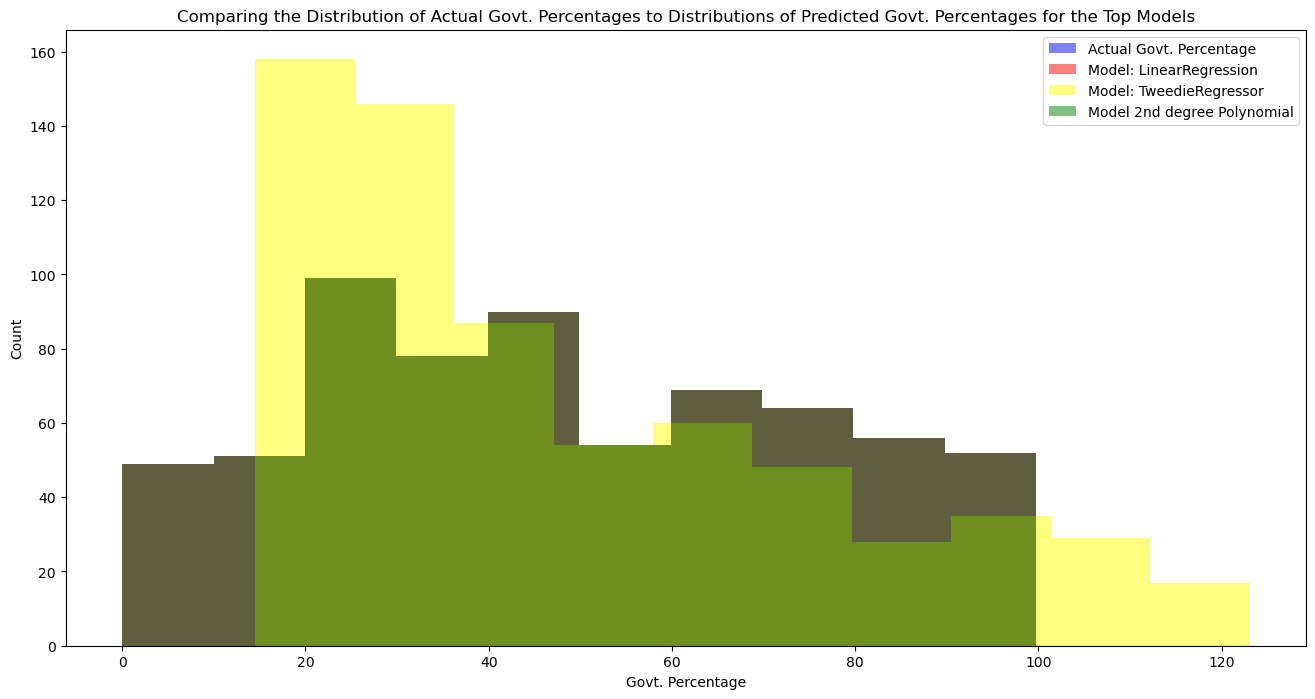

In [23]:
# Visualization comparing the top three models
model_comp_hist = prepare.model_compare_visual(y_train, y_validate, X_train, X_validate)

- Tweedie overreacts to noise, but polynomial and linear regression mirror the actual, with ***the linear regression model an almost exact match.***

# Comparing Models

- The Linear Regression, Tweedie, and Polynomial models all performed better than the baseline.
- The Linear Regression model performed the best on train and validate of all the models.
- I have chosen to move forward with the Linear Regression model because it performed better on the validate data.

# Linear Regression on Test

In [24]:
# Calling the function for the Linear Regression test model
lrm_test_model = prepare.lr_test_model(X_test, y_test, X_train, y_train)
lrm_test_model

RMSE for OLS Model using LinearRegression
Out-of-Sample Performance:  2.251674444301098e-14


The Linear Regression model performs significantly better than baseline.

## Modeling Summary

- All three of the models performed better than the baseline on train and validate.
- A linear regression model was selected as the final model and had a better error of prediction than the baseline.

# Conclusions

## Exploration

- The overall governance of countries depends on six factors evaluated from various sources, all factors connect strongly with overall governance, but ***careful consideration should be taken when exporing the impact of these factors and how the countries are ranked.***

- ***Rule of Law and Government effictiveness appear to be more important in the rankings of governments than other humanitarian considerations like political stability***, which incoporates acts of terrorism and violence, and voice and accountability, which include media outlets and other oragnizations that hold governments accountable through freedom os speech.

- **Although countries recieve high rankings for overall governance, they can also recieve low rankings for political stability and voice and accountability. However, the governments, for the most part, do not recieve high rankings if their rule of law, control of corruption, or government effectiveness ratings are lower.***

# Modeling

***The final model outperformed the baseline. Possible reasons include:***

- The high level of correlation betwee the features and the target variable possibly created a model with a high rate of accuracy.

# Recommendations

- Further analysis on the importance of governmental/legislative impacts on the rankings versus humanitarian effects on how countries are ranked should be examined to ***avoid ranking governments higher that do not incorporate political stability or accountability.***
- These findings indicate that countries are perceived as having a high level of governance if they maintain "law and order," but ***an emphasis on humanitarian initiatives and absence of violence should be given equal weight, if not more importance.***
- **These six factors should be broken down further into sub-categories to gain a better understanding of the rankings and other factors included, such as environmental, to gain a more accurate rating of each of the governments.**

# Next Steps

- Examine the dates listed in the database and do some ***historical research*** to see if any particular year(s) impacted certain rankings.
- Further ***explore the organizations responsible*** for assigning the rankings and determine if any ***amount of bias exists.***
- ***Evaluate each of the countries and determine if there are any patterns that develop, such as higher rankings for western and/or European countries compared to other regions of the world.***